# Investigation of Nyquist criteria in the context of DEER using a Bayesian approach considering Nyquist for mean distance in wings of P(r)

This file starts with a low res time trace which barely fulfills Nyquist for the mean distance contained in P(r).
Then a simulation is run that uses a Nyquist frequency thats between the horn and wings of the Pake pattern of the frequency of the shortest distance in P(r) (approx. three detections points per horn oscillation, 1.5 per wing frequency oscillation).
Lastly a simulation is run with a time trace where the Nyquist is too low for either wing or horn frequency of Pake pattern.

## Load packages and setup constants

In [2]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Fundamental constants (CODATA 2018)
NA = 6.02214076e23 # Avogadro constant, mol^-1
muB = 9.2740100783e-24 # Bohr magneton, J/T
mu0 = 1.25663706212e-6 # magnetic constant, N A^-2 = T^2 m^3 J^-1
h = 6.62607015e-34 # Planck constant, J/Hz
ge = 2.00231930436256 # free-electron g factor
hbar = h/2/m.pi # reduced Planck constant, J/(rad/s)

w0 = 1e-7*(muB*ge)**2/hbar # rad s^-1

D = (mu0/4/m.pi)*(muB*ge)**2/hbar # dipolar constant, m^3 rad s^-1
D = D/1e6/2/np.pi #--> MHz


# Setup P(r) and determine frequencies for shortest r and mean distance

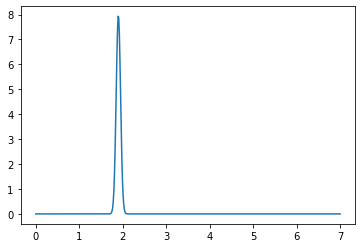

In [4]:
r = np.linspace(0.001,7,500)  

param = [1.9, 0.05]

P = dl.dd_gauss(r,param)

plt.plot(r,P);

In [5]:
idxmin = np.where(P>0.01)[0][0]
idxmean = np.where(P==max(P))[0][0]

rmin = (r[idxmin])
nu_perp = D/(rmin*1e-9)**3
nu_par = 2*nu_perp

print('shortest distance is ' + str(round(rmin,2)) + ' nm')
print('nu_perpendicular = ' + str(round(nu_perp,2)) + ' MHz')
print('nu_parallel = ' + str(round(nu_par,2)) + ' MHz')

rmin = (r[idxmean])
nu_perp = D/(rmin*1e-9)**3
nu_par = 2*nu_perp

print('mean distance is ' + str(round(rmin,2)) + ' nm')
print('nu_perpendicular = ' + str(round(nu_perp,2)) + ' MHz')
print('nu_parallel = ' + str(round(nu_par,2)) + ' MHz')

shortest distance is 1.73 nm
nu_perpendicular = 10.12 MHz
nu_parallel = 20.23 MHz
mean distance is 1.89 nm
nu_perpendicular = 7.65 MHz
nu_parallel = 15.31 MHz


# Experimental parameters (k, λ) and high resolution time trace

In [6]:
lam = 0.5                          # modulation depth
k = 0.01

tmax = 1

In [7]:
t_highres = np.linspace(0,tmax,500)

In [8]:
B_highres = dl.bg_exp(t_highres,k)         # background decay'
K_highres = dl.dipolarkernel(t_highres,r,mod=lam,bg=B_highres)    # kernel matrix

V_highres = K_highres@P + 0*dl.whitegaussnoise(t_highres,0.01,seed=0)  # DEER signal with added noise

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>min,parallel</sub> << ν<sub>nyquist</sub>

In [9]:
t = np.linspace(0,tmax,60)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

Timestep is 16.95 ns
Nyquist frequency is 29.5 MHz
The Nyquist distance is 1.52 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


In [10]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

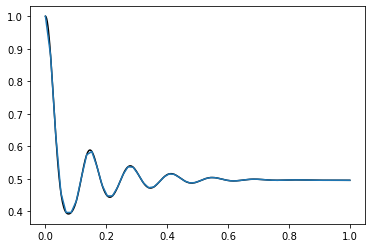

In [11]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 116 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
There were 920 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.57838964398594, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1125 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5519743359199999, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3538 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.009379866488249145, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1566 divergences after tuning. Increase `target_accept` or reparameterize.
The ac

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
k      0.004  0.003   0.000    0.009      0.001    0.001      17.0      18.0   
λ      0.503  0.002   0.500    0.506      0.000    0.000      32.0      39.0   
V₀     1.001  0.002   0.998    1.005      0.000    0.000     121.0     255.0   
σ      0.002  0.000   0.002    0.003      0.000    0.000    1064.0    5300.0   
δ      0.348  0.139   0.111    0.609      0.002    0.001    3630.0   10491.0   
lg(α) -2.909  0.105  -3.102   -2.709      0.003    0.002    1163.0    6193.0   

       r_hat  
k       1.17  
λ       1.18  
V₀      1.05  
σ       1.01  
δ       1.00  
lg(α)   1.01

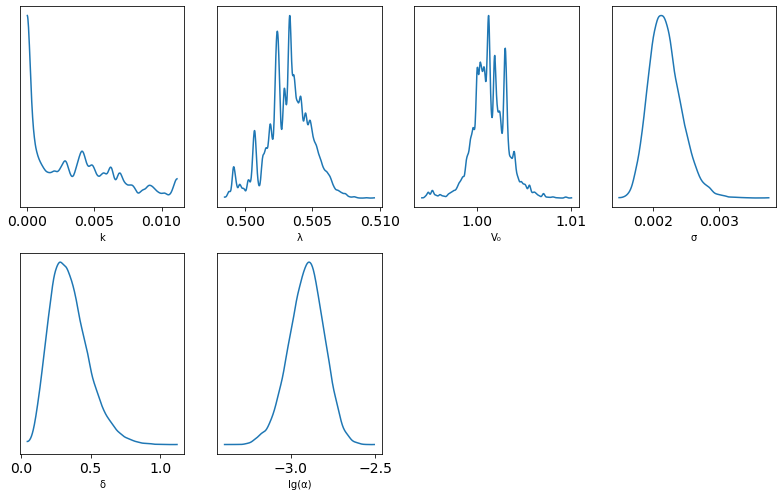

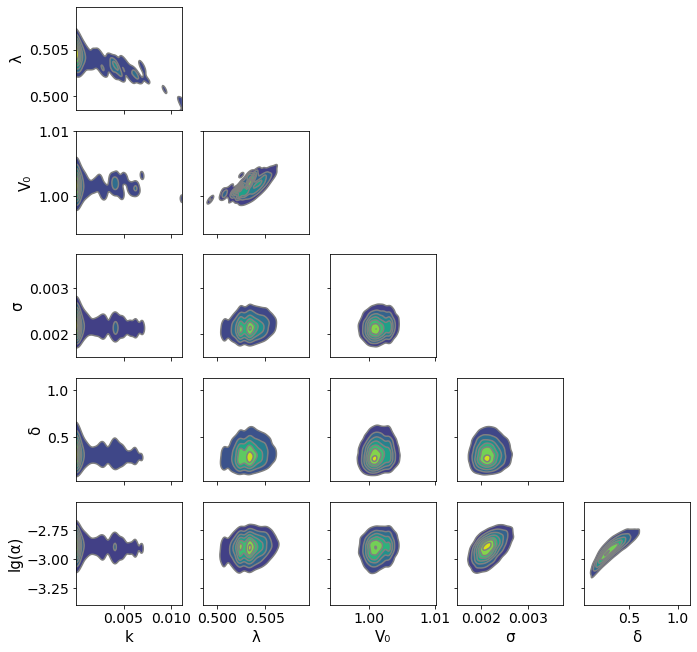

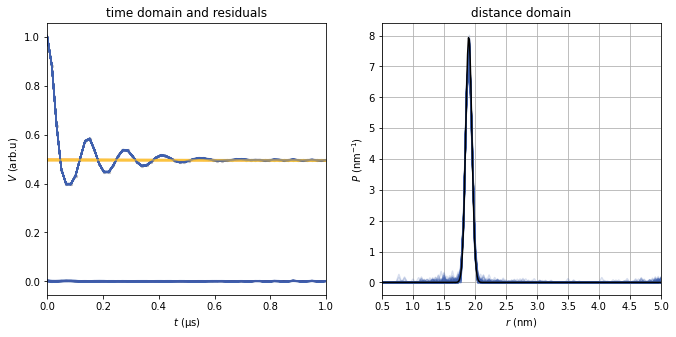

In [12]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>min,parallel</sub> < ν<sub>nyquist</sub>

Timestep is 21.74 ns
Nyquist frequency is 23.0 MHz
The Nyquist distance is 1.65 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


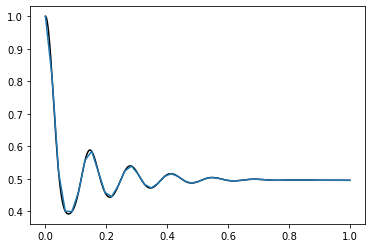

In [25]:
t = np.linspace(0,tmax,47)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

In [ ]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 3000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 286 seconds.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
There were 162 divergences after tuning. Increase `target_accept` or reparameterize.
There were 212 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6703145843983364, but should be close to 0.8. Try to increase the number of tuning steps.
There were 262 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7136383836965652, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


mean         sd  hdi_3%    hdi_97%  mcse_mean   mcse_sd  ess_bulk  \
k          0.011      0.015   0.000      0.037      0.000     0.000    2669.0   
λ          0.513      0.018   0.480      0.547      0.000     0.000    1558.0   
V₀         1.019      0.034   0.951      1.081      0.001     0.001    1683.0   
σ          0.035      0.006   0.025      0.045      0.000     0.000     232.0   
δ      15741.896  21256.289  42.608  52512.424   1726.868  1223.438     104.0   
lg(α)      0.458      0.362  -0.190      1.088      0.036     0.025     106.0   

       ess_tail  r_hat  
k        2810.0   1.00  
λ        1321.0   1.00  
V₀       1750.0   1.00  
σ         628.0   1.01  
δ         244.0   1.02  
lg(α)     261.0   1.02

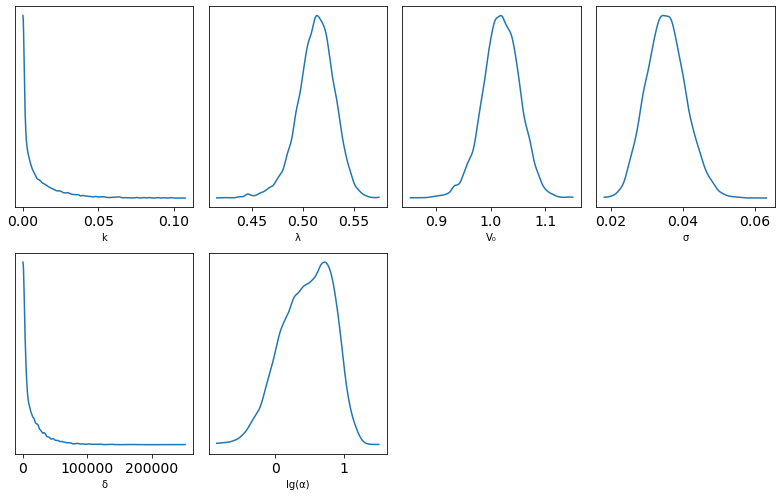

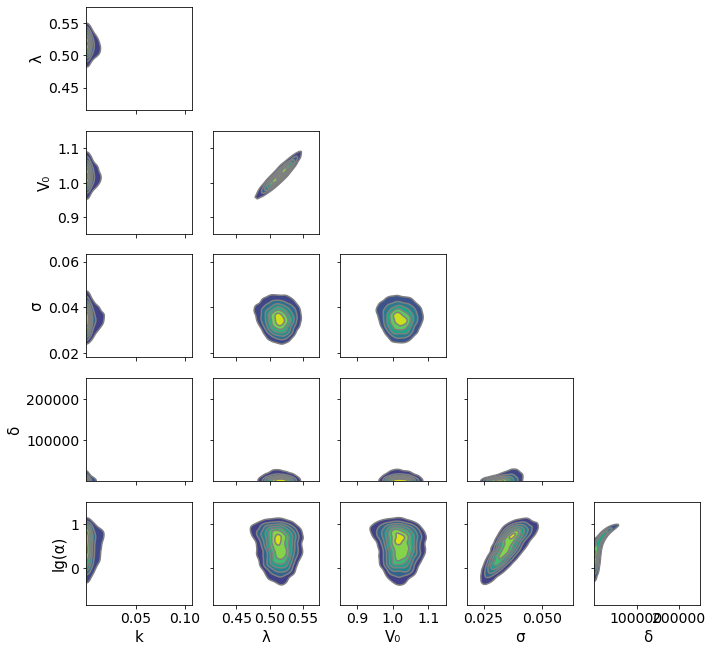

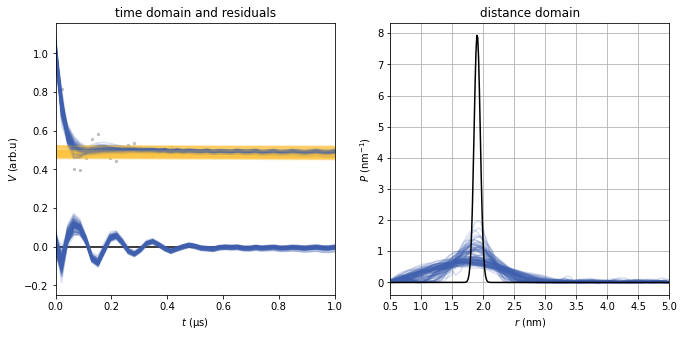

In [14]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>nyquist</sub> < ν<sub>min,parallel</sub> 

In [15]:
t = np.linspace(0,tmax,41)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4* dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

Timestep is 25.0 ns
Nyquist frequency is 20.0 MHz
The Nyquist distance is 1.73 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


In [16]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

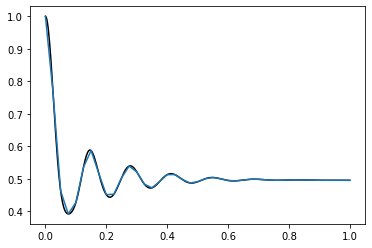

In [17]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 3_000 tune and 4_000 draw iterations (12_000 + 16_000 draws total) took 416 seconds.
There were 83 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


mean          sd    hdi_3%     hdi_97%  mcse_mean   mcse_sd  \
k          0.032       0.043     0.000       0.112      0.001     0.001   
λ          0.488       0.040     0.409       0.554      0.001     0.001   
V₀         0.977       0.058     0.862       1.082      0.002     0.001   
σ          0.053       0.016     0.029       0.083      0.001     0.000   
δ      71000.107  105723.277  1272.302  233328.788   7248.548  5132.541   
lg(α)      0.994       0.316     0.448       1.632      0.026     0.019   

       ess_bulk  ess_tail  r_hat  
k        2238.0    2825.0   1.00  
λ        1465.0     987.0   1.00  
V₀       1323.0    1242.0   1.00  
σ         550.0    1336.0   1.01  
δ         136.0     393.0   1.04  
lg(α)     148.0     397.0   1.03

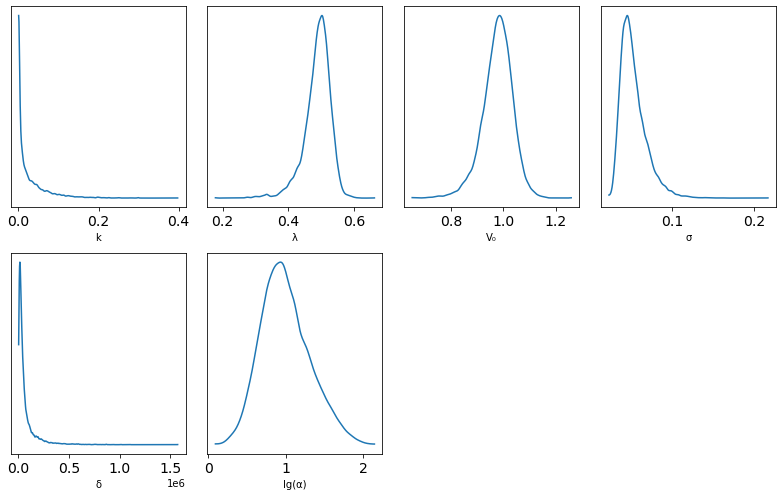

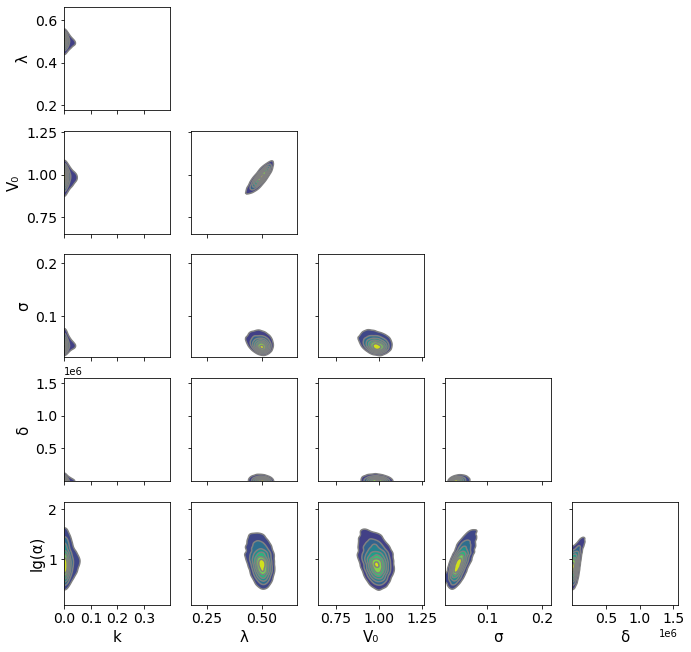

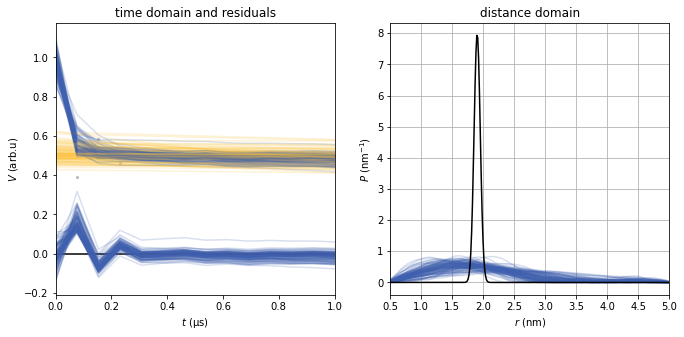

In [24]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 3000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>nyquist</sub> < ν<sub>mean,parallel</sub>  < ν<sub>min,parallel</sub> 

In [19]:
t = np.linspace(0,tmax,14)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

Timestep is 76.92 ns
Nyquist frequency is 6.5 MHz
The Nyquist distance is 2.52 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


In [20]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

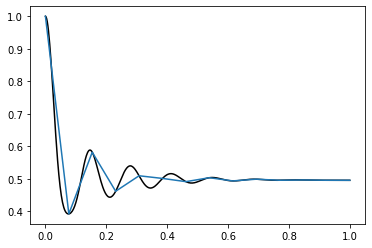

In [21]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp);

In [22]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 4000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 299 seconds.
There were 266 divergences after tuning. Increase `target_accept` or reparameterize.
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
There were 344 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5827112332708715, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


mean          sd    hdi_3%     hdi_97%  mcse_mean   mcse_sd  \
k          0.032       0.043     0.000       0.106      0.001     0.001   
λ          0.489       0.039     0.416       0.554      0.001     0.001   
V₀         0.978       0.056     0.865       1.077      0.002     0.001   
σ          0.052       0.015     0.029       0.081      0.001     0.000   
δ      69256.400  100478.198  1409.549  221011.074   6547.239  4635.343   
lg(α)      0.987       0.316     0.388       1.571      0.025     0.018   

       ess_bulk  ess_tail  r_hat  
k        1712.0    1398.0   1.00  
λ        1111.0     966.0   1.00  
V₀       1144.0    1053.0   1.00  
σ         493.0    1381.0   1.01  
δ         151.0     420.0   1.03  
lg(α)     158.0     474.0   1.03

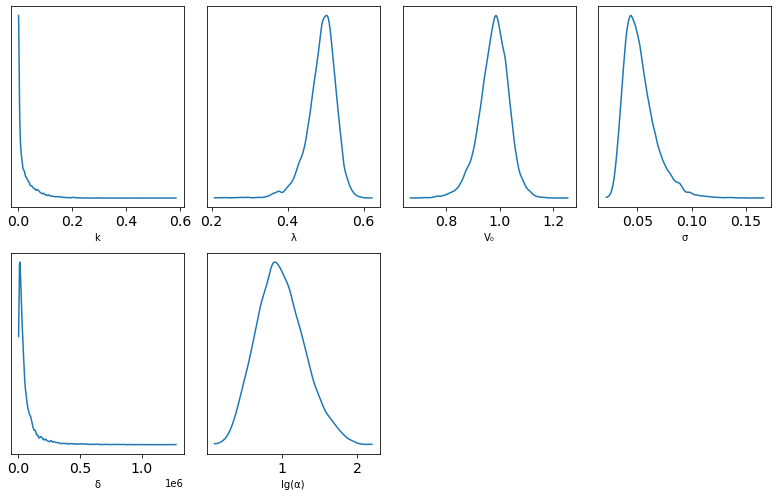

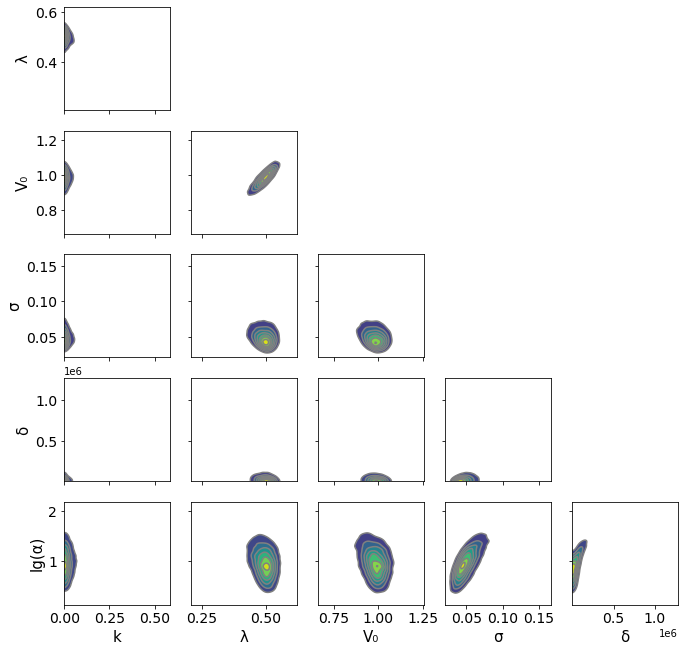

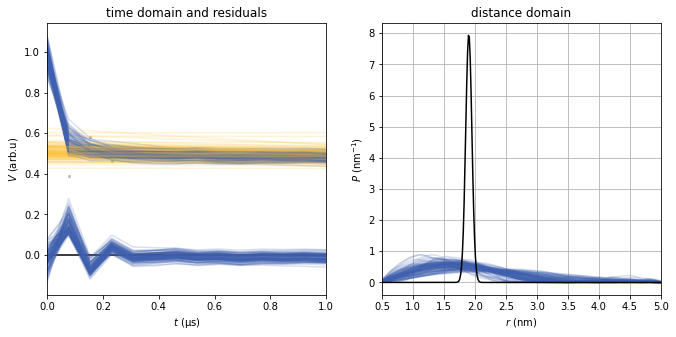

In [23]:
dive.summary(trace, model, Pref = P, rref = r)  